<a href="https://www.kaggle.com/code/thirumani/shark-tank-us-data-analysis?scriptVersionId=122366521" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## SharkTank US Exploratory Data Analysis (EDA) 

## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-us-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2023-Mar-16


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/6/68/Shark_Tank_Logo.jpg', width=360, height=270)

## ⚒️ Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

## ⏳ Check and import dataset

In [4]:
! ls -l /kaggle/input/shark-tank-us-dataset
shark_tank = pd.read_csv('/kaggle/input/shark-tank-us-dataset/Shark Tank US dataset.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 240
-rw-r--r-- 1 nobody nogroup 243220 Mar 16 14:26 'Shark Tank US dataset.csv'

There are 1097 rows and 50 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
shark_tank.head(5)

Season Number Season Start Season End  Episode Number  Pitch Number  \
0              1    09-Aug-09  05-Feb-10               1             1   
1              1    09-Aug-09  05-Feb-10               1             2   
2              1    09-Aug-09  05-Feb-10               1             3   
3              1    09-Aug-09  05-Feb-10               1             4   
4              1    09-Aug-09  05-Feb-10               1             5   

  Original Air Date              Startup Name           Industry  \
0         09-Aug-09            AvaTheElephant    Health/Wellness   
1         09-Aug-09        Mr.Tod'sPieFactory  Food and Beverage   
2         09-Aug-09                   Wispots  Business Services   
3         09-Aug-09  CollegeFoxesPackingBoxes     Lifestyle/Home   
4         09-Aug-09                  IonicEar      Software/Tech   

                              Business Description Pitchers Gender  \
0           Ava The Elephant - Baby and Child Care          Female   
1           Mr. Tod's Pie Factory - Specialty Food            Male   
2                      Wispots - Consumer Services            Male   
3  College Foxes Packing Boxes - Consumer Services            Male   
4                            Ionic Ear - Novelties            Male   

  Pitchers City Pitchers State Pitchers Average Age  \
0       Atlanta             GA                  NaN   
1      Somerset             NJ                  NaN   
2          Cary             NC                  NaN   
3         Tampa             FL                  NaN   
4      St. Paul             MN                  NaN   

            Entrepreneur Names                      Company Website  \
0              Tiffany Krumins       http://www.avatheelephant.com/   
1                   Tod Wilson                  http://whybake.com/   
2               Kevin Flannery              http://www.wispots.com/   
3  Nick Friedman, Omar Soliman  http://collegehunkshaulingjunk.com/   
4               Darrin Johnson                                  NaN   

   Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
0                     0.0           4.15                50000   
1                     0.0           4.15               460000   
2                     0.0           4.15              1200000   
3                     0.0           4.15               250000   
4                     0.0           4.15              1000000   

   Original Offered Equity  Valuation Requested  Got Deal  Total Deal Amount  \
0                     15.0               333333         1            50000.0   
1                     10.0              4600000         1           460000.0   
2                     10.0             12000000         0                NaN   
3                     25.0              1000000         0                NaN   
4                     15.0              6666667         0                NaN   

   Total Deal Equity  Deal Valuation  Number of sharks in deal  \
0               55.0         90909.0                       1.0   
1               50.0        920000.0                       2.0   
2                NaN             NaN                       NaN   
3                NaN             NaN                       NaN   
4                NaN             NaN                       NaN   

   Investment Amount Per Shark  Equity Per Shark  Royalty Deal  Loan  \
0                      50000.0              55.0           NaN   NaN   
1                     230000.0              25.0           NaN   NaN   
2                          NaN               NaN           NaN   NaN   
3                          NaN               NaN           NaN   NaN   
4                          NaN               NaN           NaN   NaN   

   Barbara Corcoran Investment Amount  Barbara Corcoran Investment Equity  \
0                             50000.0                                55.0   
1                            230000.0                                25.0   
2                                 NaN

In [6]:
shark_tank.tail(10).T

1087  \
Season Number                                                    14   
Season Start                                              23-Sep-22   
Season End                                                      NaN   
Episode Number                                                    5   
Pitch Number                                                   1089   
Original Air Date                                               NaN   
Startup Name                                     Big Bee Little Bee   
Industry                                         Children/Education   
Business Description                        Kids Accessories / Toys   
Pitchers Gender                                              Female   
Pitchers City                                                   NaN   
Pitchers State                                                  NaN   
Pitchers Average Age                                          Young   
Entrepreneur Names                  Amy Leinbach and Marlo Leinbach   
Company Website                                                 NaN   
Multiple Entrepreneurs                                          1.0   
US Viewership                                                   NaN   
Original Ask Amount                                          100000   
Original Offered Equity                                        20.0   
Valuation Requested                                          500000   
Got Deal                                                          0   
Total Deal Amount                                               NaN   
Total Deal Equity                                               NaN   
Deal Valuation                                                  NaN   
Number of sharks in deal                                        NaN   
Investment Amount Per Shark                                     NaN   
Equity Per Shark                                                NaN   
Royalty Deal                                                    NaN   
Loan                                                            NaN   
Barbara Corcoran Investment Amount                              NaN   
Barbara Corcoran Investment Equity                              NaN   
Mark Cuban Investment Amount                                    NaN   
Mark Cuban Investment Equity                                    NaN   
Lori Greiner Investment Amount                                  NaN   
Lori Greiner Investment Equity                                  NaN   
Robert Herjavec Investment Amount                               NaN   
Robert Herjavec Investment Equity                               NaN   
Daymond John Investment Amount                                  NaN   
Daymond John Investment Equity                                  NaN   
Kevin O Leary Investment Amount                                 NaN   
Kevin O Leary Investment Equity                                 NaN   
Guest Investment Amount                                         NaN   
Guest Investment Equity                                         NaN   
Guest Name                                                      NaN   
Barbara Corcoran Present                                        NaN   
Mark Cuban Present                                              NaN   
Lori Greiner Present                                            NaN   
Robert Herjavec Present                                         NaN   
Daymond John Present                                            NaN   
Kevin O Leary Present                                           NaN   

                                                                 1088  \
Season Number                                                      14   
Season Start                                                23-Sep-22   
Season End                                                        NaN   
Episode Number                                                      5   
Pitch Number                                                     1090   
Ori

In [7]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)

shark_tank['Multiple Entrepreneurs'] = shark_tank['Multiple Entrepreneurs'].astype(pd.Int32Dtype())

In [8]:
shark_tank.sample(10)

Season Number Season Start Season End  Episode Number  Pitch Number  \
1022             12    16-Oct-20  21-May-21               8          1023   
567               7    25-Sep-15  20-May-16              19           568   
216               4    14-Sep-12  17-May-13              15           217   
950              11    29-Sep-19  15-May-20              14           951   
1032             13    08-Oct-21  20-May-22               1          1033   
527               7    25-Sep-15  20-May-16               9           528   
928              11    29-Sep-19  15-May-20               9           929   
152               3    20-Jan-12  18-May-12              14           153   
286               5    20-Sep-13  16-May-14               6           287   
53                1    09-Aug-09  05-Feb-10              12            54   

     Original Air Date              Startup Name                 Industry  \
1022         11-Dec-20   Codi by Pillar Learning       Children/Education   
567          21-Feb-16                Insta-Fire           Lifestyle/Home   
216          08-Feb-13                 GetGrinds        Food and Beverage   
950                NaN               CoconutGirl        Food and Beverage   
1032         08-Oct-21             UprisingBread        Food and Beverage   
527          20-Nov-15  AdvancedSportsTechnology  Fitness/Sports/Outdoors   
928                NaN               Beardaments        Business Services   
152          11-May-12               DanceWithMe  Fitness/Sports/Outdoors   
286          25-Oct-13              ElephantChat          Uncertain/Other   
53           15-Jan-10                  Podillow           Lifestyle/Home   

                          Business Description Pitchers Gender  Pitchers City  \
1022                Educational robot for kids            Male            NaN   
567   fire starter product with less chemicals            Male            NaN   
216                Get Grinds - Specialty Food            Male  San Francisco   
950                            Coconut Girl -           Female            NaN   
1032               Low Carb gluten-free breads      Mixed Team            NaN   
527                 league and licensing group            Male            NaN   
928                             Beardaments -             Male            NaN   
152           Dance With Me - Fitness Programs            Male    Los Angeles   
286                  Elephant Chat - Novelties      Mixed Team       McKinney   
53                    The Podillow - Novelties      Mixed Team         Santee   

     Pitchers State Pitchers Average Age  \
1022            NaN               Middle   
567             NaN                  NaN   
216              CA                  NaN   
950             NaN                  NaN   
1032            NaN               Middle   
527             NaN                  NaN   
928             NaN                  NaN   
152              CA                  NaN   
286              TX                  NaN   
53               CA                  NaN   

                         Entrepreneur Names              Company Website  \
1022  William Mock, Dayu Yang, Chris Oslebo       www.pillarlearning.com   
567                                     NaN                          NaN   
216               Matt Canepa and Pat Pezet     http://www.getgrinds.com   
950                                     NaN                          NaN   
1032         William and Kristen Schumacher         www.uprisingfood.com   
527                                     NaN                          NaN   
928                                     NaN                          NaN   
152                       Billy Blanks, Jr.                          NaN   
286                                     NaN  http://www.elephantchat.com   
53                 Anthony and Tina Calvert     http://www.podillow.com/   

      Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
1022                       1

In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       1097 non-null   Int32  
 1   Season Start                        1097 non-null   object 
 2   Season End                          1071 non-null   object 
 3   Episode Number                      1097 non-null   Int32  
 4   Pitch Number                        1097 non-null   Int32  
 5   Original Air Date                   906 non-null    object 
 6   Startup Name                        1097 non-null   object 
 7   Industry                            1097 non-null   object 
 8   Business Description                1097 non-null   object 
 9   Pitchers Gender                     1091 non-null   object 
 10  Pitchers City                       498 non-null    object 
 11  Pitchers State                      739 non

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 14
Number of unique values in Season Start - 14
Number of unique values in Season End - 13
Number of unique values in Episode Number - 29
Number of unique values in Pitch Number - 1097
Number of unique values in Original Air Date - 218
Number of unique values in Startup Name - 1095
Number of unique values in Industry - 15
Number of unique values in Business Description - 1095
Number of unique values in Pitchers Gender - 3
Number of unique values in Pitchers City - 250
Number of unique values in Pitchers State - 46
Number of unique values in Pitchers Average Age - 4
Number of unique values in Entrepreneur Names - 546
Number of unique values in Company Website - 490
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in US Viewership - 168
Number of unique values in Original Ask Amount - 74
Number of unique values in Original Offered Equity - 44
Number of unique values in Valuation Requested - 162
Number of unique value

In [12]:
# Data set information
print(shark_tank['Season Number'].max(), "seasons \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")

14 seasons 

1098 startup companies came for pitching 



In [13]:
# Season-wise number of episodes
pd.pivot_table(shark_tank, values='Episode Number', columns='Season Number', aggfunc='max')

Season Number    1  2   3   4   5   6   7   8   9  10  11  12  13  14
Episode Number  14  9  15  26  29  29  29  24  24  23  24  10  10   7

In [14]:
# There were 3 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[3 4 5]


In [15]:
# Types of industries, came for investments, in all seasons
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Shark Tank USA - Industry wise startups</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

Male          623
Female        272
Mixed Team    196
Name: Pitchers Gender, dtype: int64 

Male          57%
Female        25%
Mixed Team    18%
Name: Pitchers Gender, dtype: object 



<AxesSubplot:title={'center':'Pitchers Gender wise percentage'}, ylabel='Pitchers Gender'>

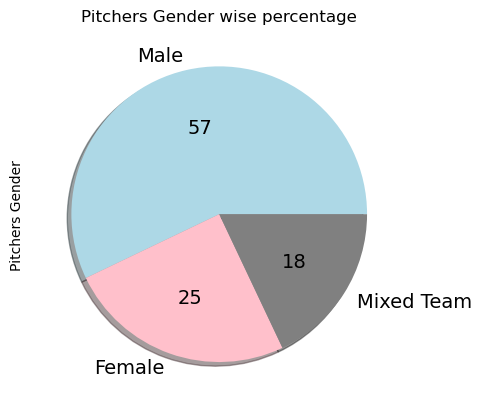

In [16]:
# Gender wise
print(shark_tank['Pitchers Gender'].value_counts(),"\n")

# In percentage
print(round(shark_tank['Pitchers Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

plt.title("Pitchers Gender wise percentage")
shark_tank["Pitchers Gender"].value_counts().plot(kind='pie', autopct='%.0f', colors=["lightblue", "pink", "gray"], shadow=True, fontsize=14)

### 💹 59% companies received offers and 41% startups could not convince Sharks to invest

1    643
0    454
Name: Got Deal, dtype: int64 

1    59%
0    41%
Name: Got Deal, dtype: object


<AxesSubplot:ylabel='Got Deal'>

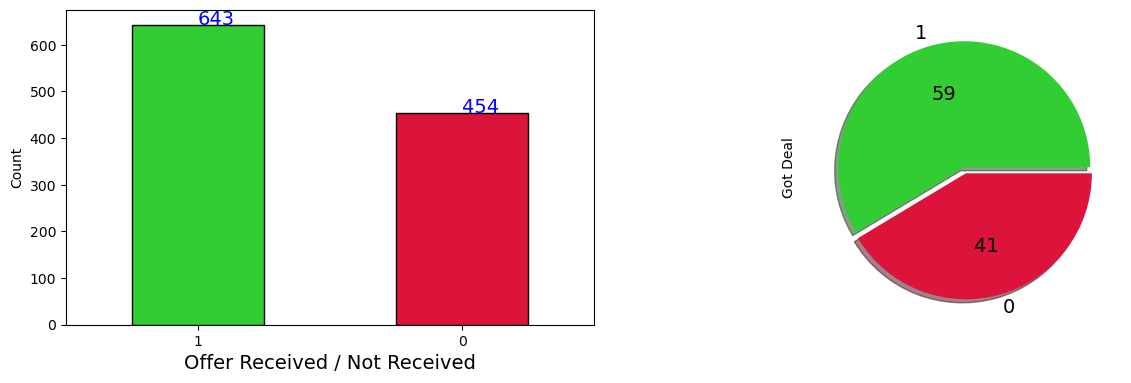

In [17]:
# Offers received
print(shark_tank['Got Deal'].value_counts(), "\n")
print(round(shark_tank['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offer Received / Not Received", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=14)

# 643 companies received offers & 454 startups could not convince #Sharks to invest.

## ❗ USA Shark Tank dataset Visualizations/infographics in Tableau Public —
### https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1

In [18]:
IFrame("https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1", width=1100, height=1100)

In [19]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].max(), 'USD', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - $5,000,000


In [20]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].min(), 'USD', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - $10,000


In [21]:
# Sum of investment amount asked
print("Sum of investment amount asked, by all startup companies, in Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in Shark Tank - $308,452,000


In [22]:
# Amount invested by all sharks
print("Amount invested by all sharks, in Shark Tank US -", format_currency(shark_tank['Total Deal Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Amount invested by all sharks, in Shark Tank US - $186,164,666


In [23]:
# # Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

shark_tank['Total Deal Amount in M'] = shark_tank['Total Deal Amount']/1000000
tmpdf = shark_tank.sort_values('Total Deal Amount in M', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount in M', color="Startup Name", title="Highest investment as per deal amount (in millions)", text=tmpdf['Total Deal Amount in M'].map(float).map(str))
fig.show()

Startup Name
AirCar                     5000000.0
MokiDoorstep               3000000.0
SynDaverLabs               3000000.0
Zipz                       2500000.0
Fizzics                    2000000.0
TenThirtyOneProductions    2000000.0
Vengo                      2000000.0
RuggedManiac               1750000.0
BeyondSushi                1500000.0
Sworkit                    1500000.0
XCraft                     1500000.0
Trunkster                  1400000.0
HyConn                     1250000.0
Jackson'sHonest            1250000.0
TheRedDressBoutique        1200000.0
Name: Total Deal Amount, dtype: float64


In [24]:
# Top 20 investments, as per total equity/shares percentage diluted
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name
ClassroomJams           100.0
CoolWraps               100.0
Evrewares               100.0
Hugo'sAmazingTape       100.0
HyConn                  100.0
MokiDoorstep            100.0
RokBlok                 100.0
TurboBaster             100.0
WineBalloon             100.0
Legacy Shave             95.0
GrooveBook               80.0
RemyxxReKixxSneakers     80.0
Henry'sHumdingers        75.0
JeskaShoeCompany         70.0
Lightfilm                70.0
TheUROClub               70.0
ReaderestSpecsecure      65.0
TheLastLid               60.0
TreasureChestPets        60.0
CordaRoy's               58.0
Name: Total Deal Equity, dtype: float64


In [25]:
# Startups who got Debt/loan amount
print("Number of startups who got debt/loan amount", shark_tank['Loan'].count(),"\n")

shark_tank.loc[shark_tank['Loan'] == 1][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity"]]

Number of startups who got debt/loan amount 42 



Season Number               Startup Name  Original Ask Amount  \
272              5           RapidRamenCooker               300000   
289              5                 BetterLife               400000   
291              5         PaparazziProposals               250000   
299              5                 Grace&Lace               175000   
300              5                       Yubo               150000   
433              6      Scratch&GrainBakingCo               150000   
459              6                   CocoJack               125000   
520              7              SavvyNaturals               200000   
563              7                    Sworkit              1500000   
571              7                 BetterBack               750000   
580              7                      Vengo              2000000   
586              7                    Coolbox               500000   
621              8                     TekDry               500000   
622              8             NightRunner270               250000   
636              8                  StyleClub               500000   
640              8  Jack'sStands&Marketplaces                50000   
642              8                       Toor               500000   
647              8                    Inboard               750000   
651              8              SealedbySanta               150000   
670              8              DBestProducts               350000   
684              8       BlentiqueWineCompany               250000   
686              8                   Rareform               300000   
703              8                Wine&Design               500000   
733              9                   WaiveCar               500000   
753              9                 EverlyWell              1000000   
754              9                       Mush               300000   
759              9                    Frywall               100000   
764              9                    Stasher               400000   
791              9               GunnarOptiks               750000   
845             10           MakeupJunkieBags               200000   
899             11                BoostOxygen              1000000   
924             11                      Outer               750000   
931             11                 Flexscreen               800000   
955             11                     Bohana               200000   
956             11             BohoCamperVans               300000   
959             11                      Goumi              1000000   
974             11               MuralPainter               300000   

     Total Deal Amount  Total Deal Equity  
272           300000.0              15.00  
289           400000.0              17.00  
291           250000.0              33.00  
299           175000.0              10.00  
300           150000.0              20.00  
433           150000.0              20.00  
459           125000.0              25.00  
520           200000.0              40.00  
563          1500000.0              10.00  
571           750000.0               7.50  
580          2000000.0              10.00  
586           500000.0              15.00  
621           500000.0               5.00  
622           200000.0              15.00  
636           500000.0              22.00  
640                0.0               0.00  
642           500000.0              10.00  
647           750000.0               4.00  
651           150000.0              20.00  
670           350000.0              20.00  
684           250000.0              10.00  
686           300000.0              10.00  
703           500000.0              10.00  
733           500000.0               2.00  
753          1000000.0               5.00  
754           300000.0              10.00  
759           100000.0              10.00  
764           400000.0              15.00  
791           750000.0               5.00  
845           200000.0  

In [26]:
# Startups who gave Royalty
print("Number of startups who gave Royalty", shark_tank['Royalty Deal'].count(),"\n")

shark_tank.loc[shark_tank['Royalty Deal'] == 1][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity"]]

Number of startups who gave Royalty 55 



Season Number               Startup Name  Original Ask Amount  \
6                 1              ClassroomJams               250000   
10                1                TurboBaster                35000   
26                1                ElementBars               150000   
69                2    FirstDefenseNasalScreen               500000   
72                2            ModMomFurniture                90000   
77                2             HillbillyBrand                50000   
125               3              TheSmartBaker                75000   
207               4              CoffeeJoulies               150000   
208               4            TeddyNeedsABath                50000   
235               4                  CoolWraps               100000   
243               4         WickedGoodCupCakes                75000   
312               5             TheWallDoctoRX               150000   
316               5                 InvisiPlug               125000   
399               6                  Honeyfund               400000   
413               6                  Pipsnacks               200000   
491               6                 SharkWheel               100000   
505               7    TheTwoGuysBowtieCompany               150000   
534               7                  Trunkster              1400000   
542               7                  FireAvert               300000   
569               7                        PRx                80000   
578               7              InnovationPet               250000   
582               7                 Wondercide               500000   
630               8                   SiliDogs               100000   
634               8               PotatoParcel                50000   
653               8                   Digiwrap               150000   
691               8                 GuardLlama               100000   
698               8     Loctote Industrial Bag               150000   
735               9                 NoMo-Stach               100000   
739               9               BrilliantPad               500000   
758               9       ModernChristmasTrees               100000   
775               9                 RounderBum               150000   
795               9                  EggMazing               350000   
826              10               Bottlekeeper              1000000   
831              10                   PopItPal               250000   
849              10                  MontiKids               200000   
883              10  TheBestPocketSqaureHolder               250000   
895              11                   Blueland               270000   
898              11                   BabyToon                50000   
912              11                   Myostorm               150000   
913              11                TailgateNGo               250000   
915              11                     EZCPak               125000   
924              11                      Outer               750000   
935              11              KreylEssence               400000   
949              11                PairEyewear               400000   
954              11           TheSpaceTraveler               100000   
961              11             CritterPricker               115000   
997              12                 PoochPaper               250000   
1000             12               AnimatedLure               325000   
1018             12       Buckle Me Baby Coats               100000   
1045             13                     SoaPen               100000   
1048             13                   Wad-Free               200000   
1064             13                Banana Loca               250000   
1074             14                  Stakt Mat               100000   
1078             14               TurboTrusser               100000   
1082             14                      Woosh               500000   

      Total Deal Amount  Tota

In [27]:
# Most frequently asked amount, by startups
shark_tank.groupby('Original Ask Amount').size().nlargest(10)

Original Ask Amount
100000    140
200000    115
150000    113
500000    109
250000     91
50000      81
300000     77
75000      43
400000     39
125000     28
dtype: int64

In [28]:
# Most frequently offered equity, by startups
shark_tank.groupby('Original Offered Equity').size().nlargest(10)

Original Offered Equity
10.0    346
20.0    207
15.0    142
5.0     129
25.0     69
30.0     30
8.0      26
7.0      14
12.0     13
40.0     12
dtype: int64

In [29]:
# Most frequently invested amount, by Sharks
shark_tank.groupby('Total Deal Amount').size().nlargest(10)

Total Deal Amount
100000.0    86
200000.0    73
150000.0    67
500000.0    59
300000.0    54
250000.0    53
50000.0     39
75000.0     27
400000.0    19
600000.0    13
dtype: int64

In [30]:
# Most frequently received total equity, by Sharks
shark_tank.groupby('Total Deal Equity').size().nlargest(10)

Total Deal Equity
25.0    105
20.0    101
30.0     63
10.0     62
15.0     56
40.0     33
50.0     32
33.0     23
5.0      20
35.0     19
dtype: int64

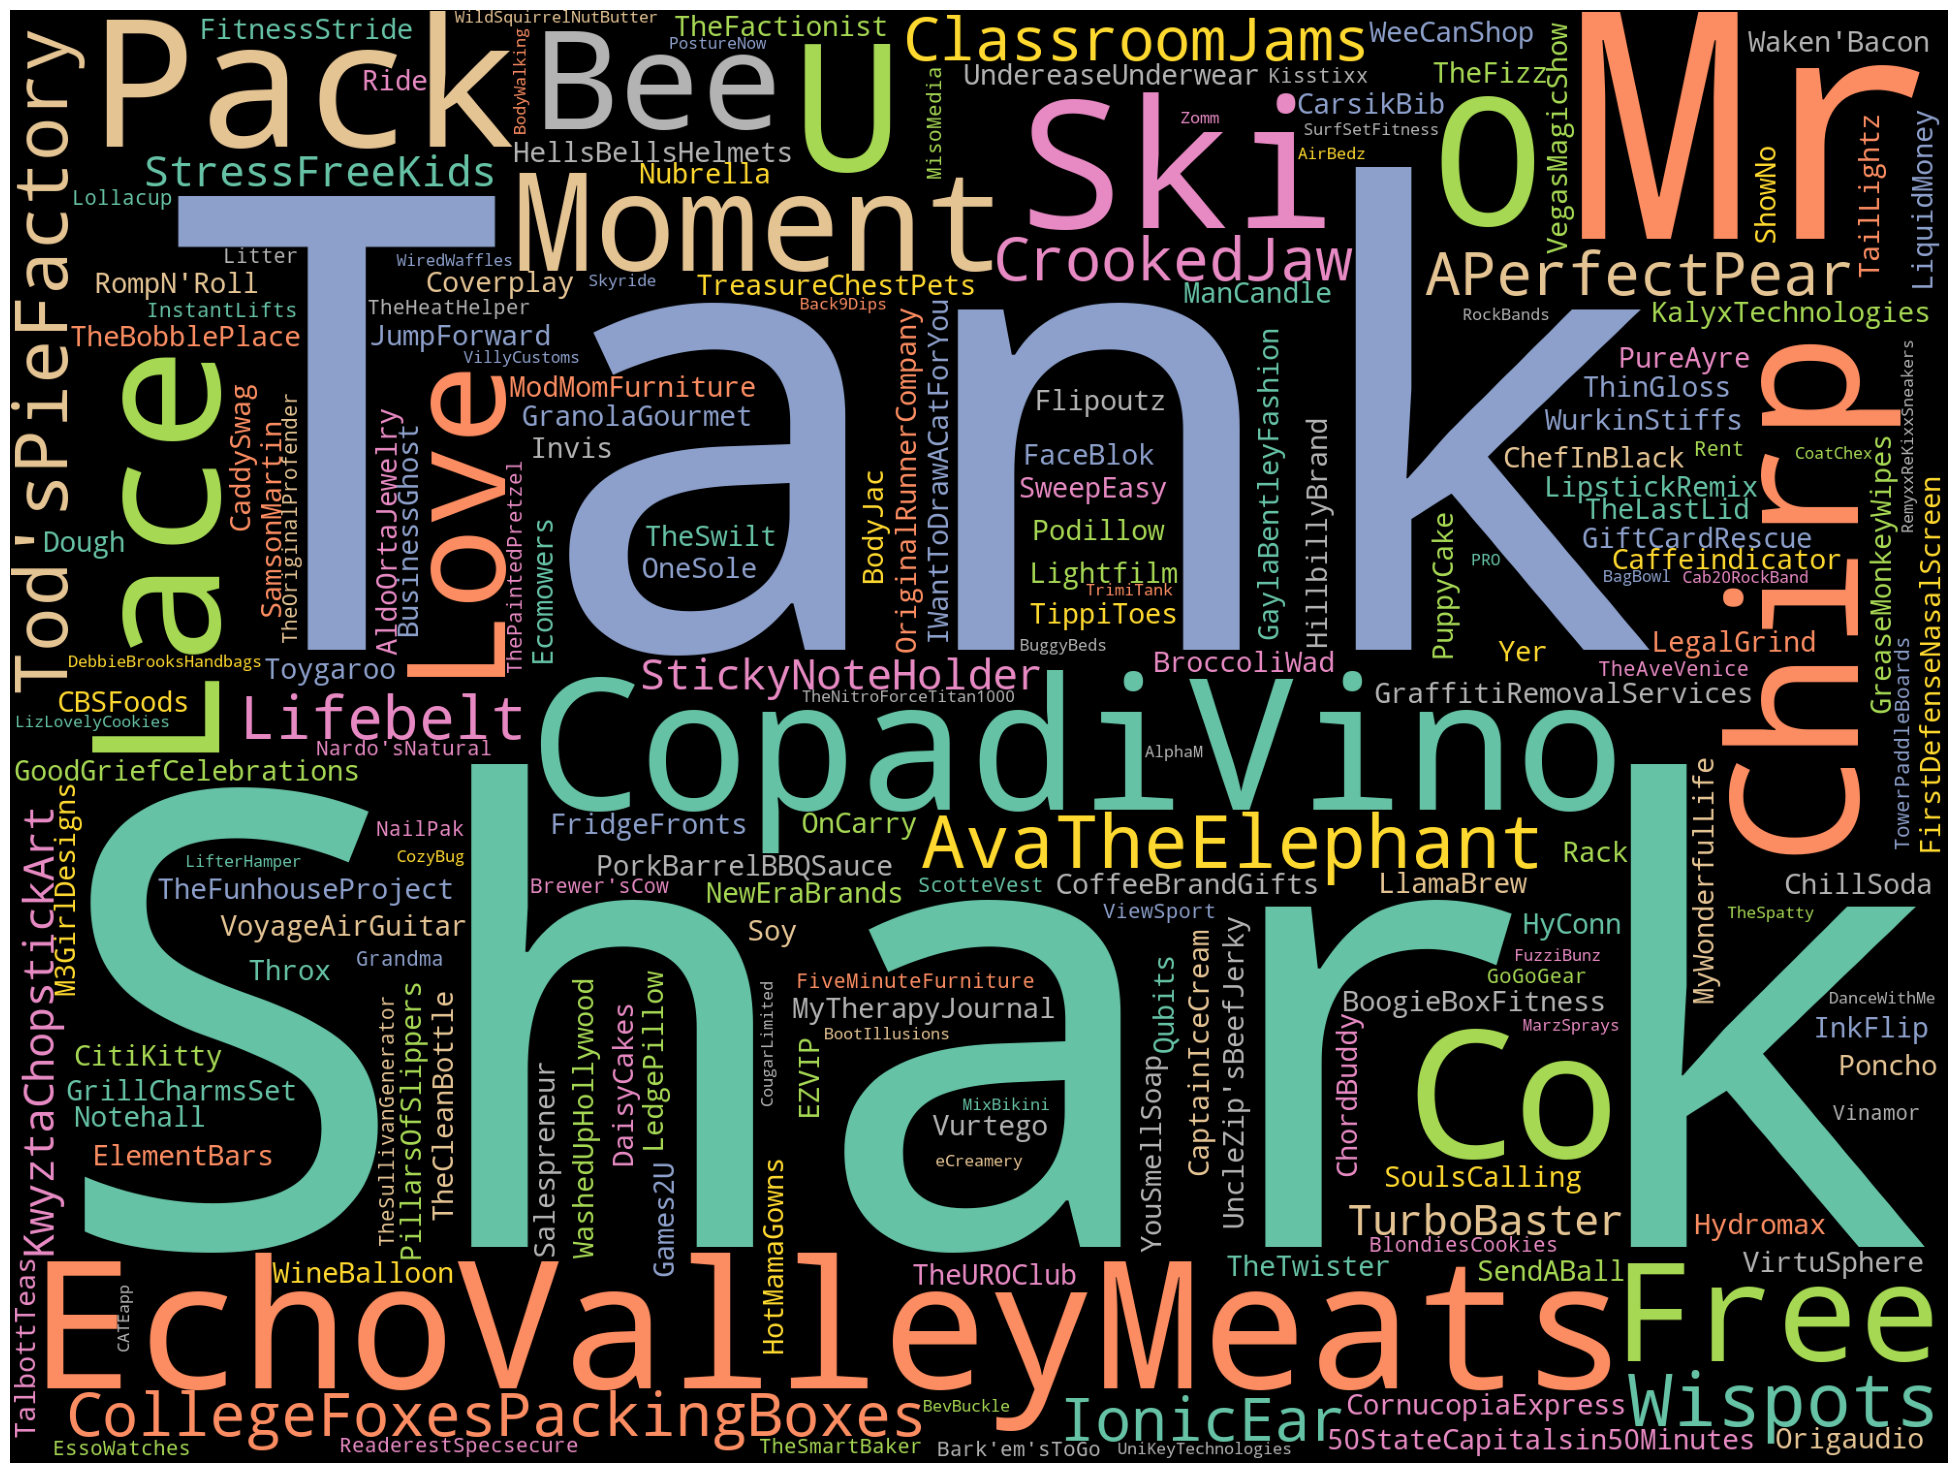

In [31]:
# Word cloud based on Startup Names
text = " Shark Tank ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 💰 Which shark invested most ?

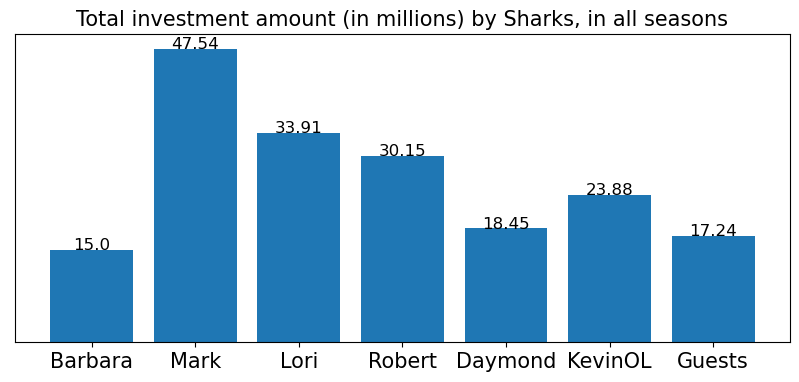

In [32]:
# Amount Invested by sharks
Amount = [(shark_tank['Barbara Corcoran Investment Amount']/1000000).sum(), (shark_tank['Mark Cuban Investment Amount']/1000000).sum(), (shark_tank['Lori Greiner Investment Amount']/1000000).sum(), (shark_tank['Robert Herjavec Investment Amount']/1000000).sum(),
    (shark_tank['Daymond John Investment Amount']/1000000).sum(), (shark_tank['Kevin O Leary Investment Amount']/1000000).sum(), (shark_tank['Guest Investment Amount']/1000000).sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total investment amount (in millions) by Sharks, in all seasons", fontsize=15)
plt.show()

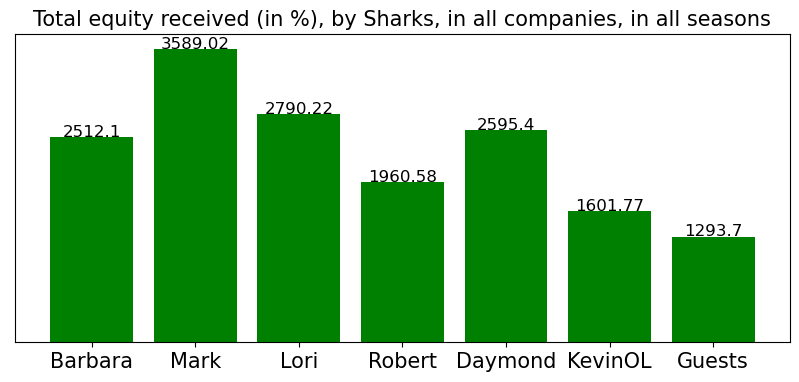

In [33]:
# Equity received by sharks
Equity = [shark_tank['Barbara Corcoran Investment Equity'].sum(), shark_tank['Mark Cuban Investment Equity'].sum(), shark_tank['Lori Greiner Investment Equity'].sum(), shark_tank['Robert Herjavec Investment Equity'].sum(),
    shark_tank['Daymond John Investment Equity'].sum(), shark_tank['Kevin O Leary Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total equity received (in %), by Sharks, in all companies, in all seasons", fontsize=15)
plt.show()

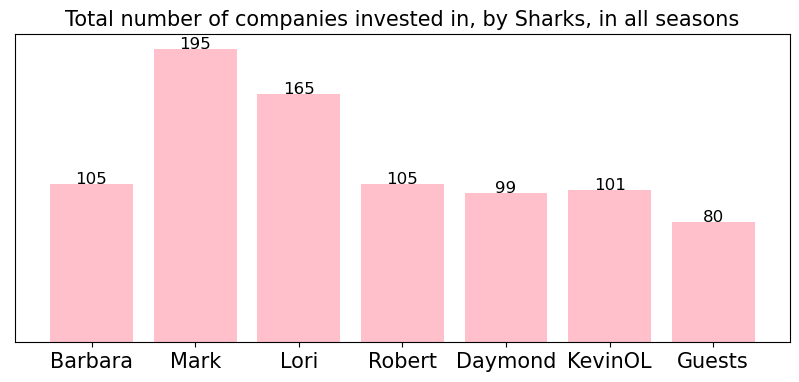

In [34]:
# Number of companies invested
Amount = [(shark_tank['Barbara Corcoran Investment Amount']).count(), (shark_tank['Mark Cuban Investment Amount']).count(), (shark_tank['Lori Greiner Investment Amount']).count(), (shark_tank['Robert Herjavec Investment Amount']).count(),
    (shark_tank['Daymond John Investment Amount']).count(), (shark_tank['Kevin O Leary Investment Amount']).count(), (shark_tank['Guest Investment Amount']).count()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested in, by Sharks, in all seasons", fontsize=15)
plt.show()

In [35]:
# Top 5, guests sharks who invested in most number of companies
shark_tank.groupby('Guest Name').size().nlargest(5)

Guest Name
Chris Sacca         40
Rohan Oza           30
Sara Blakely        20
Alex Rodriguez      18
Bethenny Frankel    12
dtype: int64

## 🔎 Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

1.0    473
2.0    146
3.0     16
5.0      5
4.0      3
Name: Number of sharks in deal, dtype: int64 

1.0    74%
2.0    23%
3.0     2%
5.0     1%
4.0     0%
Name: Number of sharks in deal, dtype: object


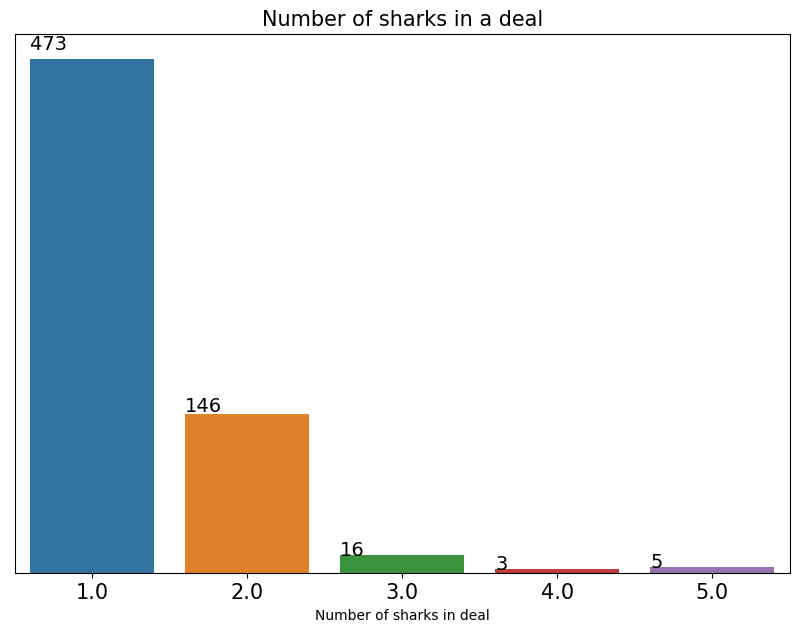

In [36]:
# Number of sharks in a deal
print(shark_tank['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of sharks in a deal", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = shark_tank, x = 'Number of sharks in deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [37]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

     Season Number   Startup Name  Total Deal Amount  Total Deal Equity
6                1  ClassroomJams           250000.0              100.0
161              4      BuggyBeds           250000.0               25.0
268              5   Breathometer          1000000.0               30.0
514              7         XCraft          1500000.0               25.0
814             10    CupBoardPro           100000.0               20.0


In [38]:
# Sharks with most number of solo deals
amt_cols = shark_tank.columns[shark_tank.columns.str.contains(' Investment Amount')].tolist()
tmp = shark_tank.loc[shark_tank['Number of sharks in deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)

# Mark did more solo deals, than any other Shark

Mark Cuban Investment Amount          98
Lori Greiner Investment Amount        87
Barbara Corcoran Investment Amount    68
dtype: int64

## 🔥Barbara Corcoran's Investments


Total investments by Barbara Corcoran 105
Investment amount by Barbara Corcoran $15,002,500
Equity received by Barbara Corcoran 2512.1 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Barbara Corcoran Investment Amount
             AvaTheElephant         Health/Wellness                             50000.0
         Mr.Tod'sPieFactory       Food and Beverage                            230000.0
              ClassroomJams      Children/Education                             50000.0
             StressFreeKids      Children/Education                            250000.0
                  Coverplay      Children/Education                             35000.0
                    BodyJac Fitness/Sports/Outdoors                            180000.0
         PorkBarrelBBQSauce       Food and Beverage                             50000.0
          TreasureChestPets            Pet

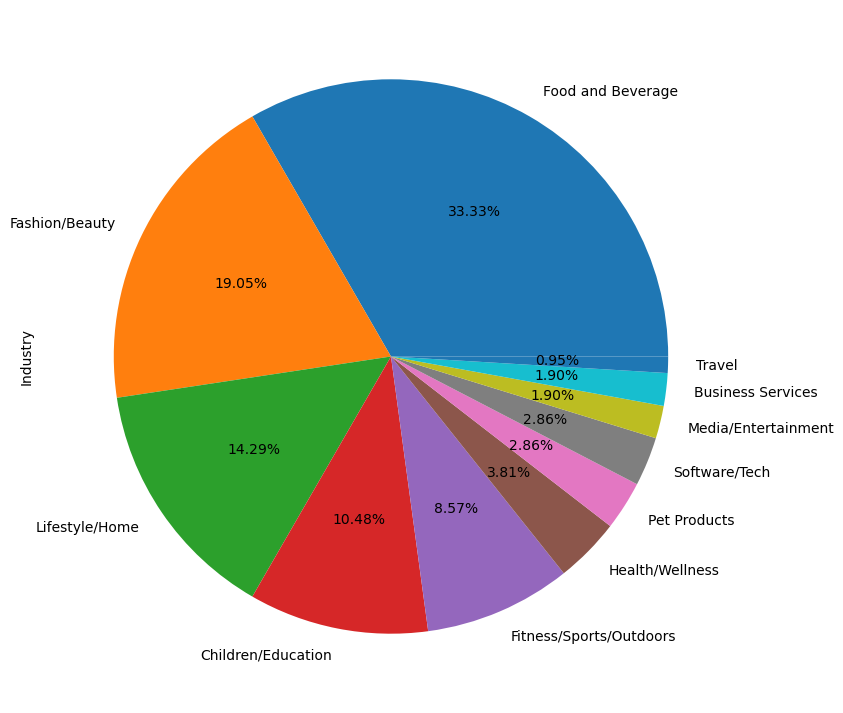

In [39]:
print("Total investments by Barbara Corcoran", shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0][['Barbara Corcoran Investment Amount']].count().to_string()[-3:])
print("Investment amount by Barbara Corcoran", format_currency(shark_tank['Barbara Corcoran Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Barbara Corcoran", round(shark_tank['Barbara Corcoran Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0][["Startup Name","Industry","Barbara Corcoran Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nBarbara Corcoran industry wise investments\n")
print(shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0] [["Startup Name","Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity"]].sort_values(by="Barbara Corcoran Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Barbara Corcoran Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎇 Mark Cuban's Investments

Total investments by Mark Cuban 195
Investment amount by Mark Cuban $47,540,000
Equity received by Mark Cuban 3589.02 % in different companies

Company details:
---------------------------------------------------------------------------
             Startup Name                Industry  Mark Cuban Investment Amount
            ClassroomJams      Children/Education                  5.000000e+04
                TippiToes Fitness/Sports/Outdoors                  5.000000e+04
                 Toygaroo      Children/Education                  1.000000e+05
  FirstDefenseNasalScreen         Health/Wellness                  2.500000e+05
                   HyConn         Uncertain/Other                  1.250000e+06
                    EZVIP     Media/Entertainment                  7.500000e+04
           TheCleanBottle       Food and Beverage                  6.000000e+04
    IWantToDrawACatForYou           Software/Tech                  2.500000e+04
              WineBalloon       Food and Be

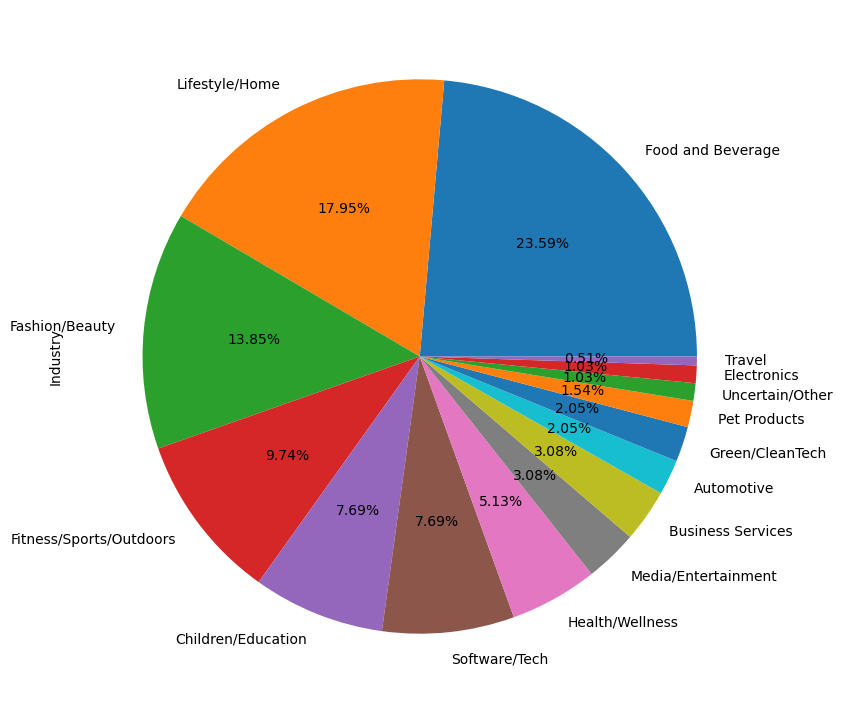

In [40]:
print("Total investments by Mark Cuban", shark_tank[shark_tank['Mark Cuban Investment Amount']>0][['Mark Cuban Investment Amount']].count().to_string()[-3:])
print("Investment amount by Mark Cuban", format_currency(shark_tank['Mark Cuban Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Mark Cuban", round(shark_tank['Mark Cuban Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0][["Startup Name","Industry","Mark Cuban Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nMark Cuban industry wise investments\n")
print(shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0] [["Startup Name","Mark Cuban Investment Amount","Mark Cuban Investment Equity"]].sort_values(by="Mark Cuban Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Mark Cuban Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## ✳️ Lori Greiner's Investments

Total investments by Lori Greiner 165
Investment amount by Lori Greiner $33,910,000
Equity received by Lori Greiner 2790.22 % in different companies

Company details:
---------------------------------------------------------------------------
           Startup Name                Industry  Lori Greiner Investment Amount
                 ShowNo          Fashion/Beauty                     75000.00000
          M3GirlDesigns          Fashion/Beauty                    100000.00000
    ReaderestSpecsecure          Lifestyle/Home                    150000.00000
                NailPak          Fashion/Beauty                     50000.00000
                BagBowl          Lifestyle/Home                     40000.00000
              Back9Dips       Food and Beverage                     75000.00000
             MarzSprays         Health/Wellness                    200000.00000
             ScrubDaddy          Lifestyle/Home                    200000.00000
           TheCoolWazoo      Children

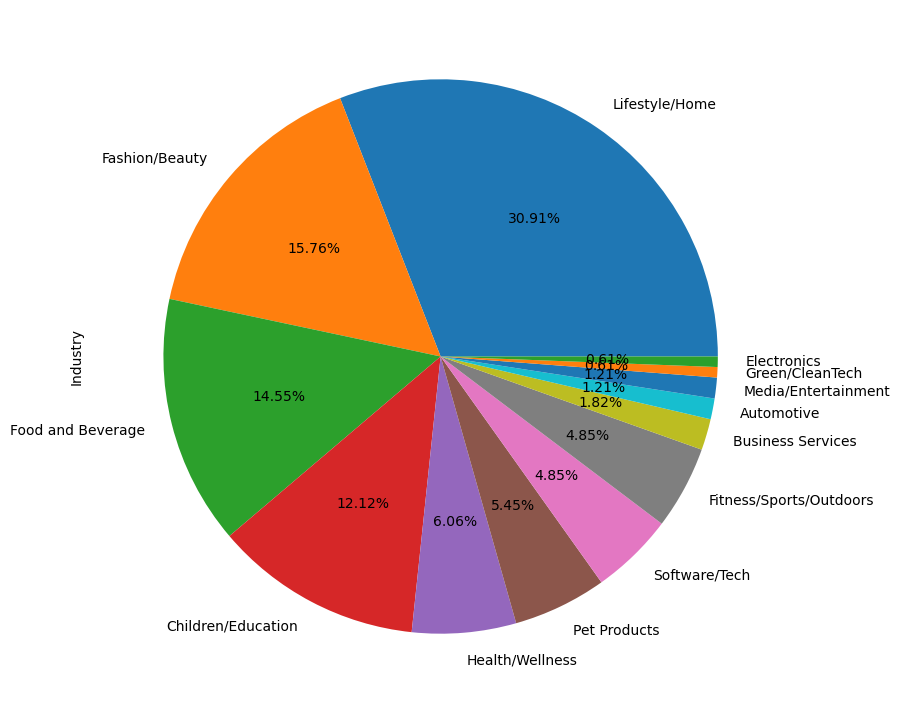

In [41]:
print("Total investments by Lori Greiner", shark_tank[shark_tank['Lori Greiner Investment Amount']>0][['Lori Greiner Investment Amount']].count().to_string()[-3:])
print("Investment amount by Lori Greiner", format_currency(shark_tank['Lori Greiner Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Lori Greiner", round(shark_tank['Lori Greiner Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0][["Startup Name","Industry","Lori Greiner Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nLori Greiner industry wise investments\n")
print(shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0] [["Startup Name","Lori Greiner Investment Amount","Lori Greiner Investment Equity"]].sort_values(by="Lori Greiner Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Lori Greiner Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🚀 Robert Herjavec's Investments

Total investments by Robert Herjavec 105
Investment amount by Robert Herjavec $30,147,332.67
Equity received by Robert Herjavec 1960.58 % in different companies

Company details:
---------------------------------------------------------------------------
           Startup Name                Industry  Robert Herjavec Investment Amount
           APerfectPear       Food and Beverage                       2.500000e+05
          ClassroomJams      Children/Education                       5.000000e+04
         GiftCardRescue           Software/Tech                       1.000000e+05
       MyTherapyJournal         Health/Wellness                       4.000000e+04
          Soy-Yer-Dough       Food and Beverage                       1.000000e+05
         GrillCharmsSet          Fashion/Beauty                       5.000000e+04
            JumpForward      Children/Education                       3.000000e+05
      GreaseMonkeyWipes          Lifestyle/Home                       2.000000e+0

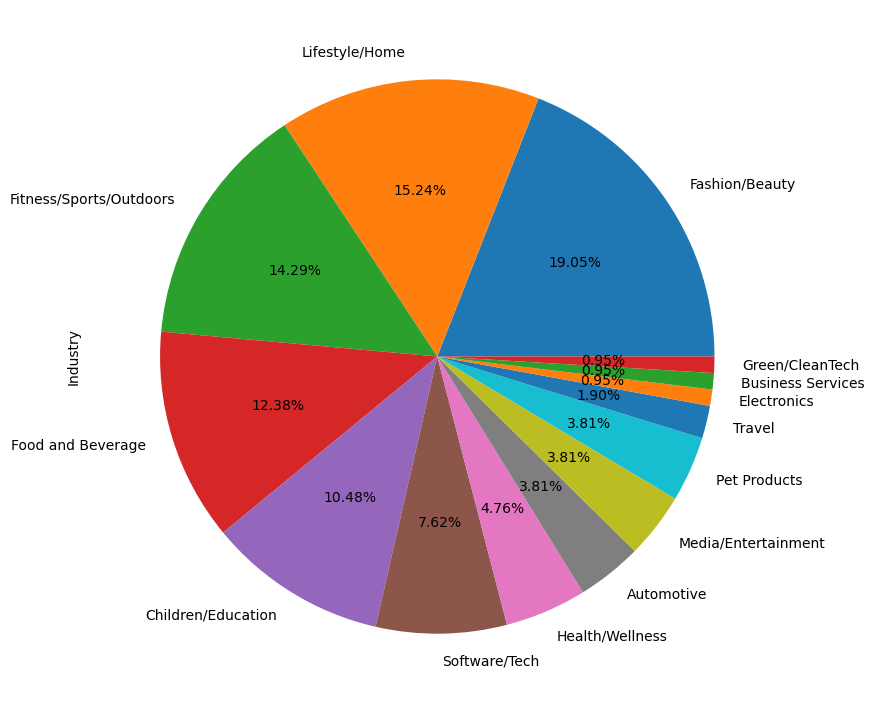

In [42]:
print("Total investments by Robert Herjavec", shark_tank[shark_tank['Robert Herjavec Investment Amount']>0][['Robert Herjavec Investment Amount']].count().to_string()[-3:])
print("Investment amount by Robert Herjavec", format_currency(shark_tank['Robert Herjavec Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Robert Herjavec", round(shark_tank['Robert Herjavec Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0][["Startup Name","Industry","Robert Herjavec Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nRobert Herjavec industry wise investments\n")
print(shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0] [["Startup Name","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity"]].sort_values(by="Robert Herjavec Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Robert Herjavec Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎾 Daymond John's Investments

Total investments by Daymond John  99
Investment amount by Daymond John $18,446,500
Equity received by Daymond John 2595.4 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Daymond John Investment Amount
         Mr.Tod'sPieFactory       Food and Beverage                        230000.0
              ClassroomJams      Children/Education                         50000.0
              Soy-Yer-Dough       Food and Beverage                        100000.0
          TreasureChestPets            Pet Products                         50000.0
        GaylaBentleyFashion          Fashion/Beauty                        125000.0
          HellsBellsHelmets Fitness/Sports/Outdoors                        500000.0
              LipstickRemix          Fashion/Beauty                         52500.0
                   Nubrella          Fashion/Beauty                        200000.0
  

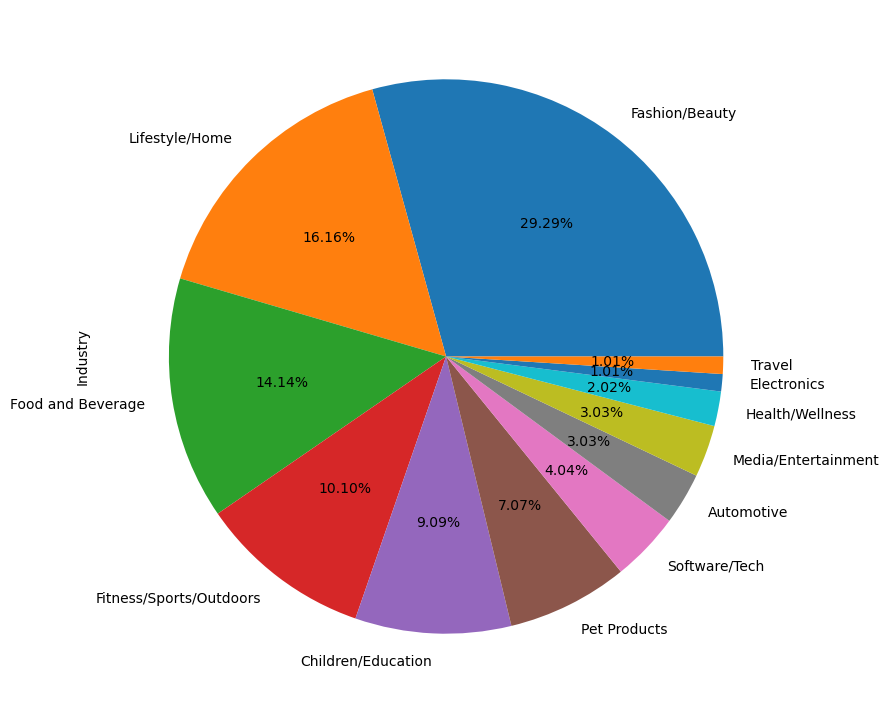

In [43]:
print("Total investments by Daymond John", shark_tank[shark_tank['Daymond John Investment Amount']>0][['Daymond John Investment Amount']].count().to_string()[-3:])
print("Investment amount by Daymond John", format_currency(shark_tank['Daymond John Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Daymond John", round(shark_tank['Daymond John Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Daymond John Investment Amount']>0][["Startup Name","Industry","Daymond John Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nDaymond John industry wise investments\n")
print(shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Daymond John Investment Amount']>0] [["Startup Name","Daymond John Investment Amount","Daymond John Investment Equity"]].sort_values(by="Daymond John Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Daymond John Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## ⭐ Kevin O Leary's Investments

Total investments by Kevin O Leary 101
Investment amount by Kevin O Leary $23,882,500
Equity received by Kevin O Leary 1601.77 % in different companies

Company details:
---------------------------------------------------------------------------
          Startup Name                Industry  Kevin O Leary Investment Amount
          APerfectPear       Food and Beverage                     2.500000e+05
         ClassroomJams      Children/Education                     5.000000e+04
        GiftCardRescue           Software/Tech                     1.000000e+05
      MyTherapyJournal         Health/Wellness                     4.000000e+04
         Soy-Yer-Dough       Food and Beverage                     1.000000e+05
           JumpForward      Children/Education                     3.000000e+05
              Toygaroo      Children/Education                     1.000000e+05
          FridgeFronts          Lifestyle/Home                     5.000000e+04
           TalbottTeas       Food 

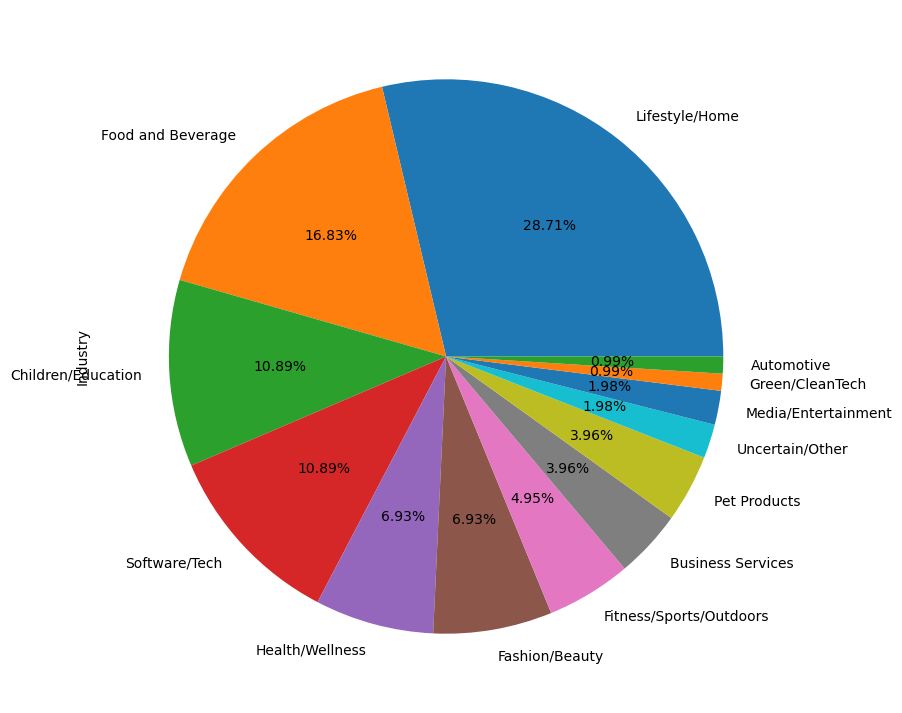

In [44]:
print("Total investments by Kevin O Leary", shark_tank[shark_tank['Kevin O Leary Investment Amount']>0][['Kevin O Leary Investment Amount']].count().to_string()[-3:])
print("Investment amount by Kevin O Leary", format_currency(shark_tank['Kevin O Leary Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Kevin O Leary", round(shark_tank['Kevin O Leary Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0][["Startup Name","Industry","Kevin O Leary Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nKevin O Leary industry wise investments\n")
print(shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0] [["Startup Name","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity"]].sort_values(by="Kevin O Leary Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Kevin O Leary Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎆 Guest's Investments

Total investments by all Guests 79
Investment amount by all Guests $17,235,833.33
Equity received by all Guests 1293.7 % in different companies

Company details:
---------------------------------------------------------------------------
             Startup Name                Industry  Guest Investment Amount
              TurboBaster       Food and Beverage             3.500000e+04
              ElementBars Fitness/Sports/Outdoors             1.500000e+05
               TheUROClub Fitness/Sports/Outdoors             2.500000e+04
           Caffeindicator       Food and Beverage             2.000000e+05
                 Hydromax Fitness/Sports/Outdoors             5.000000e+04
                CitiKitty            Pet Products             1.000000e+05
               Tree-T-Pee         Green/CleanTech             1.500000e+05
       TheCookieDoughCafe       Food and Beverage             5.000000e+04
              KitchenSafe       Food and Beverage             5.000000e+04
            

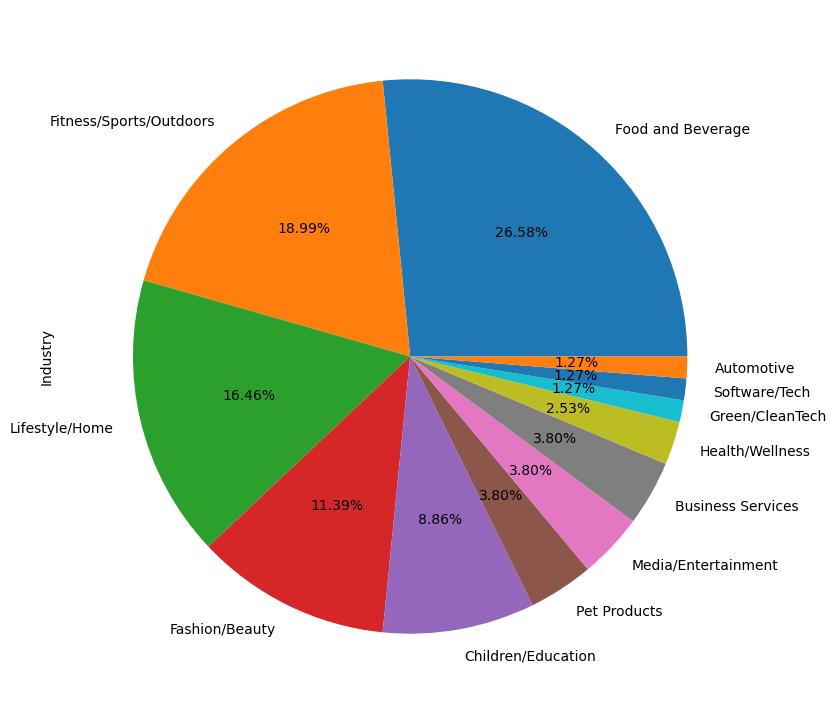

In [45]:
print("Total investments by all Guests", shark_tank[shark_tank['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", format_currency(shark_tank['Guest Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by all Guests", round(shark_tank['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAll Guests industry wise investments\n")
print(shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

In [46]:
# tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
# fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=800, height=800, color="Guest Investment Equity")
# fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
# fig.update_traces(textposition='middle center')
# fig.show()

In [47]:
# Top 25 US 🇺🇸 states of pitcher's
tmp = shark_tank['Pitchers State'].value_counts().nlargest(20).sort_values(ascending=True)
fig = px.bar(tmp, x="Pitchers State", title="<b>Top 20 States</b> from where pitchers came from", template='simple_white', text=tmp, width=850, height=750)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [48]:
# Top 20 cities
tmp = shark_tank['Pitchers City'].value_counts().nlargest(20).sort_values(ascending=True)
fig = px.bar(tmp, x="Pitchers City", title="<b>Top 20 cities</b> with number of startups came for pitching", template='simple_white', text=tmp, width=850, height=800)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [49]:
# Many (100+) companies got more amount than they asked/expected
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Season Number    Startup Name  Original Ask Amount  Total Deal Amount
15                1  GiftCardRescue               150000           200000.0
30                1   Soy-Yer-Dough               125000           300000.0
43                1     JumpForward               150000           600000.0
64                2    WurkinStiffs                85000           100000.0
65                2       TippiToes                30000           100000.0
...             ...             ...                  ...                ...
1056             13    Pink Picasso               400000           500000.0
1072             14       Oogiebear               400000           600000.0
1077             14      TheWoobles               250000           450000.0
1093             14          Wondry               185000           225000.0
1096             14    Legacy Shave               300000           700000.0

[110 rows x 4 columns]

In [50]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

Season Number        Startup Name  Original Offered Equity  \
0                 1      AvaTheElephant                     15.0   
1                 1  Mr.Tod'sPieFactory                     10.0   
5                 1        APerfectPear                     15.0   
6                 1       ClassroomJams                     10.0   
10                1         TurboBaster                     35.0   
...             ...                 ...                      ...   
1092             14        Collars & Co                      4.0   
1093             14              Wondry                      8.0   
1094             14                Frsh                      5.0   
1095             14          Actionglow                     15.0   
1096             14        Legacy Shave                     10.0   

      Total Deal Equity  
0                  55.0  
1                  50.0  
5                  50.0  
6                 100.0  
10                100.0  
...                 ...  
1092               10.0  
1093               15.0  
1094               20.0  
1095               30.0  
1096               95.0  

[541 rows x 4 columns]

In [51]:
# Below companies got the same valuation they requested
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Season Number       Startup Name  Valuation Requested  Deal Valuation
51                1  GreaseMonkeyWipes               100000        100000.0
60                1             Qubits               176471        176471.0
78                2    Ride-OnCarry-On               200000        200000.0
85                2         DaisyCakes               200000        200000.0
92                2             HyConn              1250000       1250000.0
...             ...                ...                  ...             ...
999              12           HugSleep              1500000       1500000.0
1000             12       AnimatedLure              3250000       3250000.0
1030             12     Bubbly Blaster               600000        600000.0
1045             13             SoaPen              1000000       1000000.0
1082             14              Woosh              5000000       5000000.0

[92 rows x 4 columns]

In [52]:
# There are companies which got more valuation than they pitched
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Season Number              Startup Name  Valuation Requested  \
30                1             Soy-Yer-Dough               500000   
31                1            GrillCharmsSet               200000   
77                2            HillbillyBrand               200000   
84                2                 SweepEasy               160000   
104               3     IWantToDrawACatForYou                40000   
112               3               WineBalloon               133333   
113               3                    ShowNo               200000   
149               3             BootIllusions               333333   
232               4              Lose12Inches               480000   
268               5              Breathometer              2500000   
276               5                 Hamboards               666667   
285               5                  FiberFix               900000   
323               5        TheCookieDoughCafe               250000   
324               5                Cycloramic              1800000   
336               5                RevoLights              1500000   
400               6          BeatBoxBeverages              2000000   
436               6                     Lumio              3125000   
444               6               DrainStrain               733333   
491               6                SharkWheel              2000000   
502               7                  Loliware              1500000   
514               7                    XCraft              2500000   
517               7               Windcatcher              2500000   
580               7                     Vengo             16000000   
582               7                Wondercide             10000000   
654               8             HandOutGloves               750000   
671               8                 Tranquilo              1000000   
675               8                   Toymail             10000000   
721               9                 IceShaker               666667   
744               9                 DNASimple               800000   
775               9                RounderBum              1500000   
788               9                   Radiate               250000   
829              10                  Oatmeals              2500000   
831              10                  PopItPal              2500000   
845              10          MakeupJunkieBags              1333333   
852              10                   SubSafe               384615   
912              11                  Myostorm              1500000   
925              11  Mrs.Goldfarb'sUnrealDeli              1000000   
935              11             KreylEssence              4000000   
1077             14                TheWoobles              5000000   

      Deal Valuation  
30          588235.0  
31          250000.0  
77          300000.0  
84          227273.0  
104          75758.0  
112         400000.0  
113         300000.0  
149        1250000.0  
232         500000.0  
268        3333333.0  
276        1000000.0  
285        2083333.0  
323         333333.0  
324        3333333.0  
336        3000000.0  
400        3030303.0  
436        3500000.0  
444        1100000.0  
491        3000000.0  
502        2400000.0  
514        6000000.0  
517        4000000.0  
580       20000000.0  
582       16666667.0  
654        1200000.0  
671        1333333.0  
675       12000000.0  
721        1000000.0  
744        1333333.0  
775        3000000.0  
788         400000.0  
829       15000000.0  
831        5000000.0  
845        4000000.0  
852         400000.0  
912        3000000.0  
925        1250000.0  
935        8000000.0  
1077       7500000.0

In [53]:
# Episodes which got most TRP
print("Maximum Viewership in US:", shark_tank['US Viewership'].max(), "\n")
print(shark_tank.loc[shark_tank['US Viewership']>=shark_tank['US Viewership'].max()-0.4][["Season Number","Episode Number","Startup Name","US Viewership"]].head(18).sort_values("US Viewership",ascending=False).to_string(index=False))

Maximum Viewership in US: 8.64 

 Season Number  Episode Number    Startup Name  US Viewership
             6              15        TurboPUP           8.64
             6              15           Lumio           8.64
             6              15      BelloVerde           8.64
             6              15         Napwell           8.64
             6              20        LuminAid           8.43
             6              20         Scholly           8.43
             6              20        KeenHome           8.43
             6              20    TaalumaTotes           8.43
             5              27       Angellift           8.33
             5              27        HangEase           8.33
             5              27 TheBouqsCompany           8.33
             5              27      SustyParty           8.33
             5              21   PackbackBooks           8.29
             5              21          Chapul           8.29
             5              21  Garag

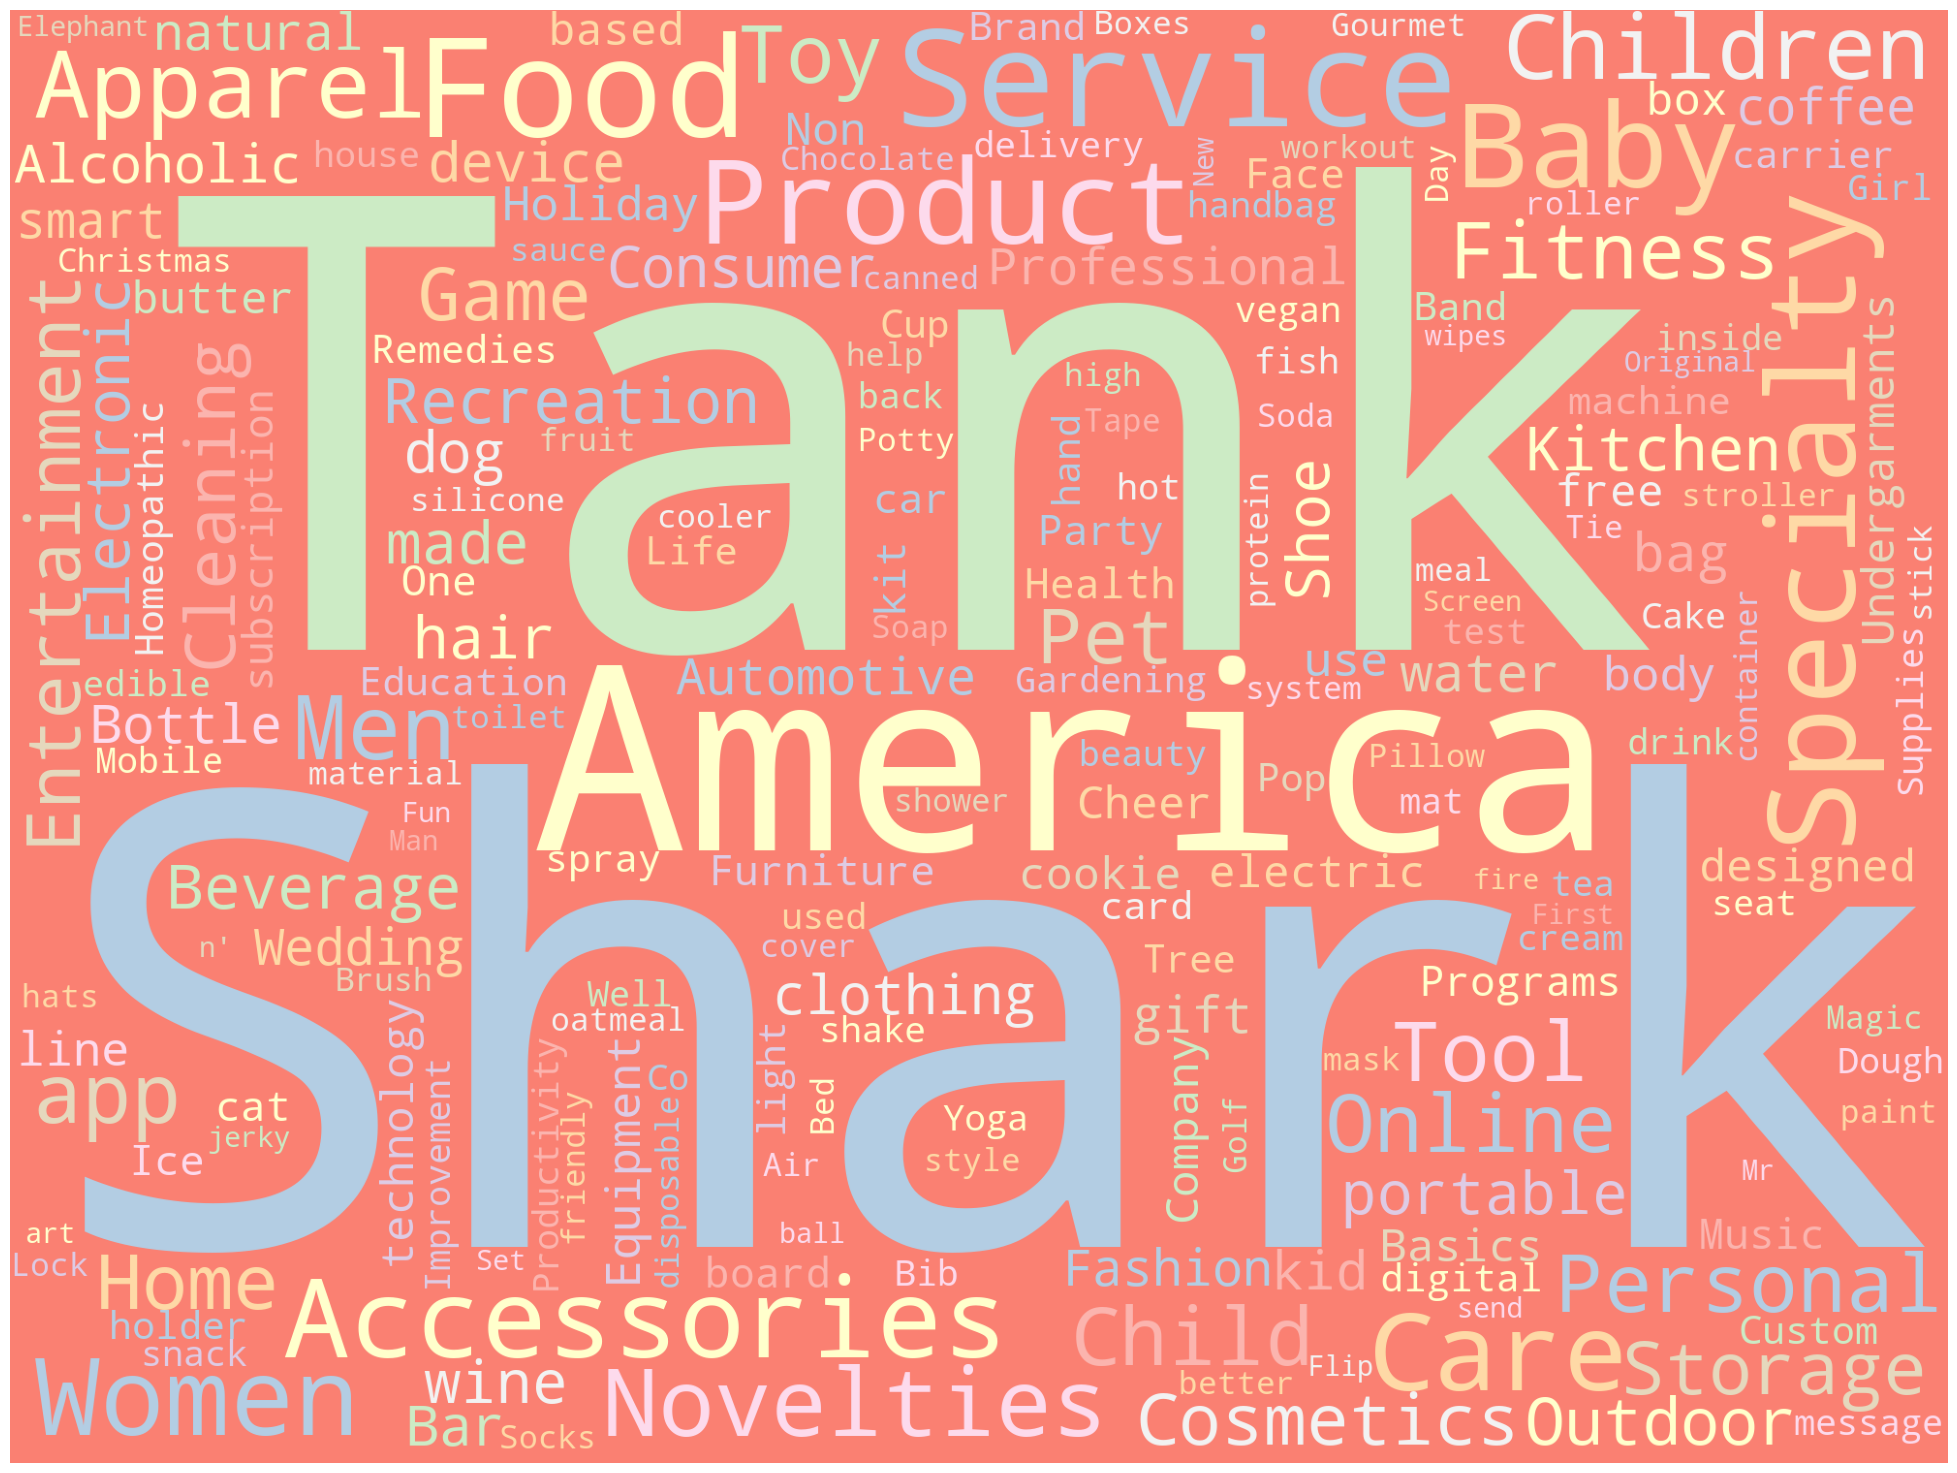

In [54]:
# Word cloud based on Business Description, startups came in season 1
text = " Shark Tank America ".join(cat for cat in shark_tank['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [55]:
# Correlation matrix
shark_tank.corr().style.background_gradient(cmap = 'Blues')

In [56]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current versions
# numpy version: 1.21.6
# pandas version: 1.3.5
# matplotlib version: 3.5.3
# seaborn version: 0.12.2
# plotly version: 5.13.0

numpy version: 1.21.6
pandas version: 1.3.5
matplotlib version: 3.5.3
seaborn version: 0.12.2
plotly version: 5.13.0


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [57]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [58]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Equity'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [59]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Deal Valuation'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [60]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Number of sharks in deal'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [61]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Investment Amount Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [62]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Equity Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [63]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Amount'].fillna(0) + shark_tank['Mark Cuban Investment Amount'].fillna(0) + shark_tank['Lori Greiner Investment Amount'].fillna(0) + shark_tank['Robert Herjavec Investment Amount'].fillna(0) + shark_tank['Daymond John Investment Amount'].fillna(0) + shark_tank['Kevin O Leary Investment Amount'].fillna(0) + shark_tank['Guest Investment Amount'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [64]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Equity'].fillna(0) + shark_tank['Mark Cuban Investment Equity'].fillna(0) + shark_tank['Lori Greiner Investment Equity'].fillna(0) + shark_tank['Robert Herjavec Investment Equity'].fillna(0) + shark_tank['Daymond John Investment Equity'].fillna(0) + shark_tank['Kevin O Leary Investment Equity'].fillna(0) + shark_tank['Guest Investment Equity'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [65]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].notnull()) & (shark_tank['Guest Name'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [66]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] != 0) & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [67]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 0) & (shark_tank['Entrepreneur Names'].notnull() & shark_tank['Entrepreneur Names'].str.contains(' and'))]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [68]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 1) & (shark_tank['Entrepreneur Names'].str.contains(' and ')==False)]

Season Number Season Start Season End  Episode Number  Pitch Number  \
73                2    20-Mar-11  13-May-11               3            74   
144               3    20-Jan-12  18-May-12              12           145   
173               4    14-Sep-12  17-May-13               4           174   
219               4    14-Sep-12  17-May-13              16           220   
279               5    20-Sep-13  16-May-14               5           280   
280               5    20-Sep-13  16-May-14               5           281   
303               5    20-Sep-13  16-May-14              11           304   
319               5    20-Sep-13  16-May-14              15           320   
365               5    20-Sep-13  16-May-14              26           366   
443               6    26-Sep-14  15-May-15              17           444   
1022             12    16-Oct-20  21-May-21               8          1023   
1082             14    23-Sep-22        NaN               4          1084   

     Original Air Date              Startup Name            Industry  \
73           01-Apr-11                  Flipoutz      Fashion/Beauty   
144          27-Apr-12                  Lollacup  Children/Education   
173          05-Oct-12                 Back9Dips   Food and Beverage   
219          15-Feb-13                SmartWheel          Automotive   
279          18-Oct-13      VeggieMamaGardenPops   Food and Beverage   
280          18-Oct-13   RuffleButts-RuggedButts      Fashion/Beauty   
303          06-Dec-13  De-BonedBabyBackRibSteak   Food and Beverage   
319          24-Jan-14                   SwimZip  Children/Education   
365          25-Apr-14                  Mo'sBows      Fashion/Beauty   
443          03-Feb-15                FreshPatch        Pet Products   
1022         11-Dec-20   Codi by Pillar Learning  Children/Education   
1082               NaN                     Woosh      Lifestyle/Home   

                                   Business Description Pitchers Gender  \
73                      Flipoutz - Toys and Games coins      Mixed Team   
144                      Lollacup - Baby and Child Care      Mixed Team   
173                        Back 9 Dips - Specialty Food      Mixed Team   
219                        The Smart Wheel - Automotive      Mixed Team   
279   Veggie Mama Garden Pops - Baby and Children's ...      Mixed Team   
280   Ruffle Butts - Rugged Butts - Baby and Childre...      Mixed Team   
303       De-Boned Baby Back Rib Steak - Specialty Food      Mixed Team   
319                       SwimZip - Baby and Child Care      Mixed Team   
365                       Mo's Bows - Men's Accessories      Mixed Team   
443                          Fresh Patch - Pet Products      Mixed Team   
1022                         Educational robot for kids            Male   
1082                                 Smart Air Filters             Male   

     Pitchers City Pitchers State Pitchers Average Age  \
73    Myrtle Beach             NC                  NaN   
144       Monrovia             CA                  NaN   
173          Tampa             FL                  NaN   
219    Londonderry             NJ                  NaN   
279         Upland             CA                  NaN   
280      Grapevine             TX                  NaN   
303           Avon             OH                  NaN   
319    Kansas City             KS                  NaN   
365        Memphis             TN                  NaN   
443      Davenport             FL                  NaN   
1022           NaN            NaN               Middle   
1082           NaN            NaN               Middle   

                         Entrepreneur Names  \
73                            Emily Johnson   
144                               Hanna Lim   
173                     David & Nique Mealy   
219                       The Inventioneers   
279                          Theresa Fraijo   
280                            Amber Schaub   
303    

In [69]:
shark_tank.loc[(shark_tank['Got Deal'] != 0) & (shark_tank['Got Deal'] != 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [70]:
shark_tank.loc[(shark_tank['Got Deal'] == 0) & (shark_tank['Total Deal Amount'].notnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [71]:
shark_tank.loc[(shark_tank['Pitchers Gender'] == 'Mixed Team') & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]